In [1]:
# Import libraries 
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import glob 
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os
import sys
import warnings
import keras
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:

Emotions= pd.read_csv('/kaggle/input/emotion/emotion (1).csv')
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,labels
0,-258.990326,132.193741,5.314349,21.521330,-24.357752,-2.237025,-24.086287,-9.530801,-20.967497,-4.285268,...,-0.953883,1.146237,1.829600,2.893938,1.310414,1.626812,2.758013,4.257873,3.918041,male_happy
1,-258.667152,132.047682,5.236842,21.529129,-24.335813,-2.170860,-24.135509,-9.465332,-20.959675,-4.215839,...,-0.906946,1.140402,1.826270,2.867984,1.350153,1.576485,2.766849,4.228887,3.915566,male_happy
2,-301.181824,128.659897,4.380285,9.940308,-23.697367,-7.601327,-25.921268,-13.189119,-19.924520,-0.300373,...,3.321182,3.191138,3.419615,3.112536,1.654553,3.749860,5.546700,4.269989,1.401541,male_happy
3,-274.135437,142.405472,-2.322214,21.200804,-27.737436,-1.496183,-26.762552,-10.112954,-21.643480,-3.658734,...,-1.149690,1.346368,2.298612,3.353943,1.820001,2.129130,2.610373,4.910376,4.944275,male_happy
4,-274.135437,142.405472,-2.322214,21.200804,-27.737436,-1.496183,-26.762552,-10.112954,-21.643480,-3.658734,...,-1.149690,1.346368,2.298612,3.353943,1.820001,2.129130,2.610373,4.910376,4.944275,male_happy


In [3]:
X = Emotions.drop('labels',axis = 1)
Y = Emotions['labels']

In [4]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [5]:
# since it is a multiclass classifier, i will perform onehotencoding
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [6]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,shuffle = True)

x_train.shape,y_train.shape,x_test.shape,y_test.shape

((48648, 40), (48648, 14), (12162, 40), (12162, 14))

In [7]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((48648, 40), (48648, 14), (12162, 40), (12162, 14))

# CNN

In [8]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D,Dense,AveragePooling1D,Dropout,add,BatchNormalization,LSTM,Flatten,MaxPooling1D,GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import relu, softmax
from keras.activations import relu, softmax
from sklearn.metrics import confusion_matrix,classification_report

In [9]:
x_traincnn =np.expand_dims(x_train, axis=2)
x_testcnn= np.expand_dims(x_test, axis=2)
x_traincnn.shape, y_train.shape, x_testcnn.shape, y_test.shape

((48648, 40, 1), (48648, 14), (12162, 40, 1), (12162, 14))

In [10]:
my_model=Sequential()
my_model.add(Conv1D(256, kernel_size=7, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
my_model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
my_model.add(BatchNormalization())

my_model.add(Conv1D(128, kernel_size=7, strides=1, padding='same', activation='relu'))
my_model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
my_model.add(BatchNormalization())

my_model.add(Conv1D(128, kernel_size=7, strides=1, padding='same', activation='relu'))
my_model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
my_model.add(BatchNormalization())


my_model.add(Conv1D(64, kernel_size=7, strides=1, padding='same', activation='relu'))
my_model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
my_model.add(BatchNormalization())
my_model.add(Dropout(0.5))
        
my_model.add(Flatten())
my_model.add(Dense(units=32, activation='relu'))
my_model.add(Dropout(0.5))

my_model.add(Dense(units=14, activation='softmax'))
my_model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 40, 256)           2048      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 20, 256)          0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 20, 256)          1024      
 ormalization)                                                   
                                                                 
 conv1d_1 (Conv1D)           (None, 20, 128)           229504    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 10, 128)          0         
 1D)                                                             
                                                        

In [11]:
history = my_model.fit(x_traincnn, y_train, batch_size=32, epochs=100, validation_data=(x_testcnn, y_test))

Epoch 1/100
1521/1521 [==============================] - 26s 11ms/step - loss: 1.9267 - accuracy: 0.3438 - val_loss: 1.3646 - val_accuracy: 0.4917
Epoch 2/100
1521/1521 [==============================] - 14s 9ms/step - loss: 1.4886 - accuracy: 0.4597 - val_loss: 1.2050 - val_accuracy: 0.5446
Epoch 3/100
1521/1521 [==============================] - 13s 9ms/step - loss: 1.3504 - accuracy: 0.5000 - val_loss: 1.1414 - val_accuracy: 0.5672
Epoch 4/100
1521/1521 [==============================] - 14s 9ms/step - loss: 1.2530 - accuracy: 0.5338 - val_loss: 1.0633 - val_accuracy: 0.5958
Epoch 5/100
1521/1521 [==============================] - 14s 9ms/step - loss: 1.1809 - accuracy: 0.5586 - val_loss: 0.9822 - val_accuracy: 0.6225
Epoch 6/100
1521/1521 [==============================] - 14s 9ms/step - loss: 1.1189 - accuracy: 0.5851 - val_loss: 0.9638 - val_accuracy: 0.6378
Epoch 7/100
1521/1521 [==============================] - 13s 9ms/step - loss: 1.0488 - accuracy: 0.6088 - val_loss: 0.9088 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [41]:
print("Accuracy of our model  : " , round(my_model.evaluate(x_testcnn,y_test)[1],2)*100 , "%")

ValueError: in user code:

    File "/opt/conda/lib/python3.7/site-packages/keras/engine/training.py", line 1820, in test_function  *
        return step_function(self, iterator)
    File "/opt/conda/lib/python3.7/site-packages/keras/engine/training.py", line 1804, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/conda/lib/python3.7/site-packages/keras/engine/training.py", line 1792, in run_step  **
        outputs = model.test_step(data)
    File "/opt/conda/lib/python3.7/site-packages/keras/engine/training.py", line 1758, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "/opt/conda/lib/python3.7/site-packages/keras/engine/training.py", line 1083, in compute_loss
        y, y_pred, sample_weight, regularization_losses=self.losses
    File "/opt/conda/lib/python3.7/site-packages/keras/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/opt/conda/lib/python3.7/site-packages/keras/losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "/opt/conda/lib/python3.7/site-packages/keras/losses.py", line 284, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/opt/conda/lib/python3.7/site-packages/keras/losses.py", line 2005, in categorical_crossentropy
        y_true, y_pred, from_logits=from_logits, axis=axis
    File "/opt/conda/lib/python3.7/site-packages/keras/backend.py", line 5532, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 14) are incompatible


In [13]:
model_name = 'emotion_model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)   # adds file in folder
my_model.save(model_path)
print('Save model and weights at %s' % model_path)
model_json = my_model.to_json()
with open('model_json.json', 'w') as json_file:
    json_file.write(model_json)

Save model and weights at /kaggle/working/saved_models/emotion_model.h5


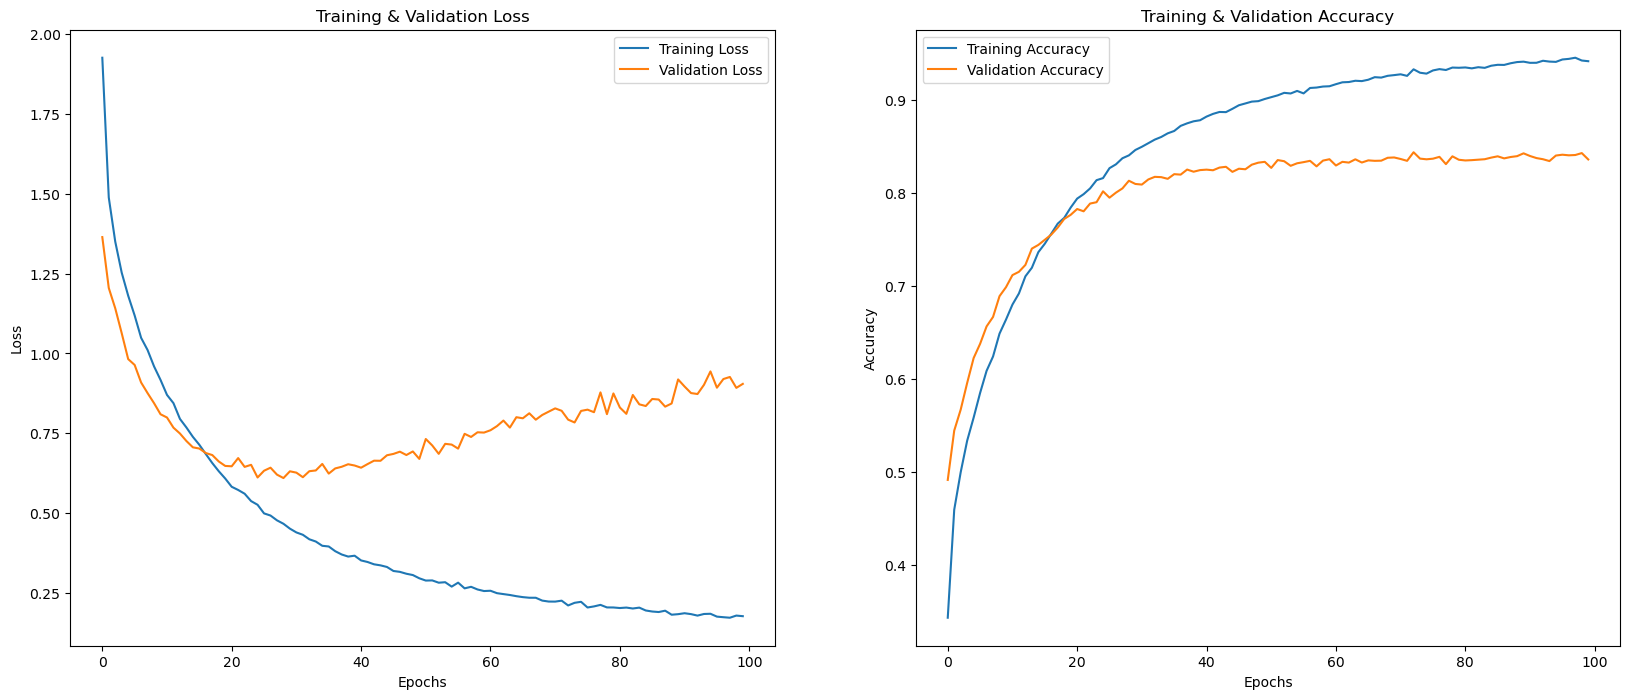

In [38]:
epochs = [i for i in range(100)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,8)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Validation Loss')
ax[0].set_title('Training & Validation Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Validation Accuracy')
ax[1].set_title('Training & Validation Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy")
plt.show()

In [15]:
# predicting on test data.
pred_test = my_model.predict(x_testcnn)
y_pred = encoder.inverse_transform(pred_test)
y_test = encoder.inverse_transform(y_test)

381/381 [==============================] - 1s 2ms/step


In [16]:
df = pd.DataFrame(columns=['PredictedLabels', 'ActualLabels'])
df['PredictedLabels'] = y_pred.flatten()
df['ActualLabels'] = y_test.flatten()

In [17]:
df

,PredictedLabels,ActualLabels
0,female_fear,female_fear
1,male_neutral,male_neutral
2,female_sad,female_sad
3,female_happy,female_happy
4,male_sad,male_sad
...,...,...
12157,male_disgust,male_disgust
12158,male_sad,male_sad
12159,female_sad,female_sad
12160,male_angry,male_angry


In [18]:
df.to_csv('Predictions.csv', index = False)

In [20]:
import seaborn as sns

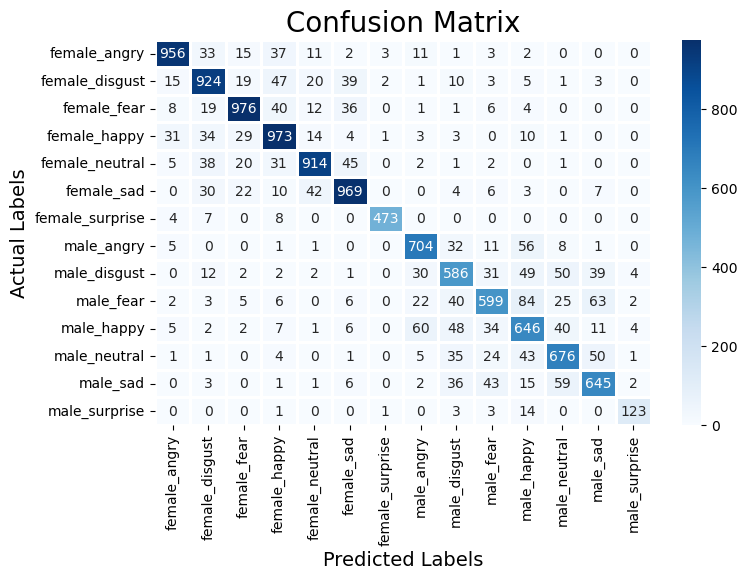

In [21]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8,5))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [22]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

   female_angry       0.93      0.89      0.91      1074
 female_disgust       0.84      0.85      0.84      1089
    female_fear       0.90      0.88      0.89      1103
   female_happy       0.83      0.88      0.86      1103
 female_neutral       0.90      0.86      0.88      1059
     female_sad       0.87      0.89      0.88      1093
female_surprise       0.99      0.96      0.97       492
     male_angry       0.84      0.86      0.85       819
   male_disgust       0.73      0.73      0.73       808
      male_fear       0.78      0.70      0.74       857
     male_happy       0.69      0.75      0.72       866
   male_neutral       0.79      0.80      0.79       841
       male_sad       0.79      0.79      0.79       813
  male_surprise       0.90      0.85      0.88       145

       accuracy                           0.84     12162
      macro avg       0.84      0.84      0.84     12162
   weighted avg       0.84   

# Emotion accuracy

In [23]:
modidf = pd.read_csv("Predictions.csv")
modidf['actualvalues'] = modidf.ActualLabels.replace({'female_angry':'angry'
                                       , 'female_disgust':'disgust'
                                       , 'female_fear':'fear'
                                       , 'female_happy':'happy'
                                       , 'female_sad':'sad'
                                       , 'female_surprise':'surprise'
                                       , 'female_neutral':'neutral'
                                       , 'male_angry':'angry'
                                       , 'male_fear':'fear'
                                       , 'male_happy':'happy'
                                       , 'male_sad':'sad'
                                       , 'male_surprise':'surprise'
                                       , 'male_neutral':'neutral'
                                       , 'male_disgust':'disgust'
                                      })
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns

In [24]:
modidf['predictedvalues'] = modidf.PredictedLabels.replace({'female_angry':'angry'
                                       , 'female_disgust':'disgust'
                                       , 'female_fear':'fear'
                                       , 'female_happy':'happy'
                                       , 'female_sad':'sad'
                                       , 'female_surprise':'surprise'
                                       , 'female_neutral':'neutral'
                                       , 'male_angry':'angry'
                                       , 'male_fear':'fear'
                                       , 'male_happy':'happy'
                                       , 'male_sad':'sad'
                                       , 'male_surprise':'surprise'
                                       , 'male_neutral':'neutral'
                                       , 'male_disgust':'disgust'
                                      })

classes = modidf.actualvalues.unique()  
classes.sort() 
# Confusion matrix 
c = confusion_matrix(modidf.actualvalues, modidf.predictedvalues)
print(accuracy_score(modidf.actualvalues, modidf.predictedvalues))

0.8423778983719783


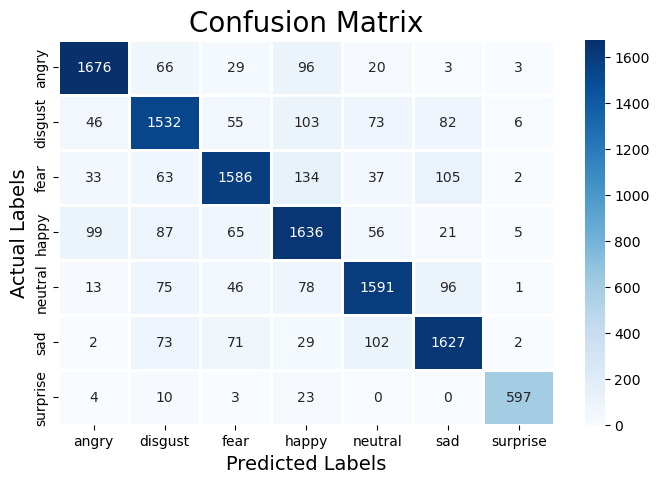

In [25]:
cm = confusion_matrix(modidf.actualvalues, modidf.predictedvalues)
plt.figure(figsize = (8,5))
x= pd.DataFrame(cm,  columns=(classes), index=(classes))
sns.heatmap(x, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

# Classification report

In [26]:
classes = modidf.actualvalues.unique()
classes.sort()    
print(classification_report(modidf.actualvalues, modidf.predictedvalues, target_names=classes))

              precision    recall  f1-score   support

       angry       0.89      0.89      0.89      1893
     disgust       0.80      0.81      0.81      1897
        fear       0.85      0.81      0.83      1960
       happy       0.78      0.83      0.80      1969
     neutral       0.85      0.84      0.84      1900
         sad       0.84      0.85      0.85      1906
    surprise       0.97      0.94      0.95       637

    accuracy                           0.84     12162
   macro avg       0.86      0.85      0.85     12162
weighted avg       0.84      0.84      0.84     12162

